In this notebook, I aim to visualize this dataset. Below are several visualizations that can provide insights and feedback to both internal and external top stakeholders.

The dataset itself pertains to the pricing of trips from November to December 2018, on the online transportation platforms Uber and Lyft in the city of Boston.












In [ ]:
# mounting google colab to my drive
!pip install feature-engine
from google.colab import drive
drive.mount('/content/drive')

# to manipulate data
import pandas as pd

# processing and manipulating data in array form
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#for data processing and storage
import ast
import pickle

# converts a CSV file stored on the drive into a dataframe
df = pd.read_csv('/content/drive/MyDrive/PORTOFOLIO/RideHailing-FarePrediction-LinearRegression/rideshare_kaggle.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# IIa. Visualization of missing values


Firstly, I will visualize the missing values that I encountered during the data cleaning process in the previous notebook.

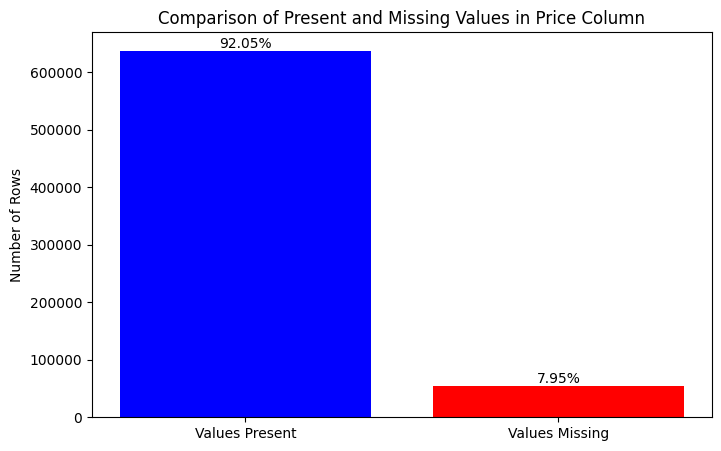

Uber - Taxi: 55095


In [ ]:
# counting the number of existing and missing values
value_count = df['price'].notnull().sum()
missing_count = df['price'].isnull().sum()

# preparing data for visualization
counts = [value_count, missing_count]
labels = ['Values Present', 'Values Missing']
total = value_count + missing_count

# Creating the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, counts, color=['blue', 'red'])

# Adding percentage labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval/total*100:.2f}%', ha='center', va='bottom')

plt.title('Comparison of Present and Missing Values in Price Column')
plt.ylabel('Number of Rows')
plt.show()

# filter rows with missing values in 'price' column
missing_price = df[df['price'].isnull()]

# group by 'cab_type' and 'name', then count the number of missing values
missing_value_count = missing_price.groupby(['cab_type', 'name']).size().reset_index(name='missing_count')

# display results in the desired format
for index, row in missing_value_count.iterrows():
    cab_type = row['cab_type']
    name = row['name']
    count = row['missing_count']
    print(f'{cab_type} - {name}: {count}')

As can be observed from the bar plot visualization above, the missing values in the 'price' column amount to 7%, which is equivalent to 55,095 rows. Rows containing missing values are associated with the Uber platform, specifically within the Taxi service.

This issue warrants further investigation by Uber's operational team to understand why the 'price' column is not being recorded for the Taxi service.

# IIb. Average price based on cab type




In order to make informed decisions related to tariff adjustments and strategic planning, it is essential to visualize the average prices of Uber and Lyft rides during the period from November to December 2018. This data serves a crucial purpose for:

* **Tariff Adjustments**
: Companies can use this data to make real-time tariff adjustments based on current demand and supply dynamics, allowing for revenue optimization and responsiveness to market trends.

* **Strategic Analysis**
: Average price data is invaluable for analyzing business performance, identifying market trends, and devising more effective business strategies.

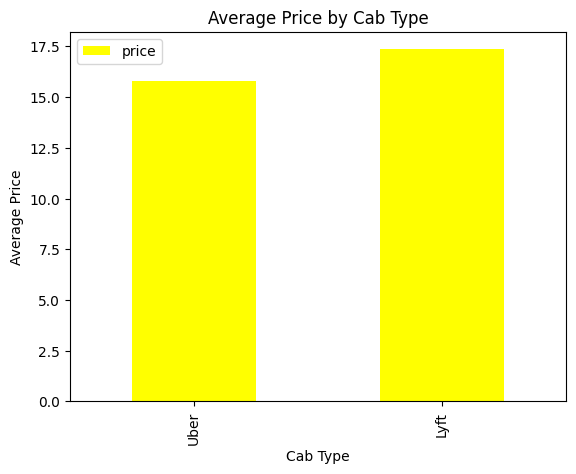

cab_type
Lyft    17.351396
Uber    15.795343
Name: price, dtype: float64

In [ ]:
# uber and lyft bar plot visualization
average_prices = df.groupby('cab_type')[['price']].mean()
colors = ['yellow', 'orange']
average_prices.sort_values('price').plot(kind='bar', color=colors)
plt.xlabel('Cab Type')
plt.ylabel('Average Price')
plt.title('Average Price by Cab Type')
plt.show()

# displays a table of average prices
df.groupby('cab_type')['price'].mean()

We can observe that the average price for Lyft rides stands at $17.351396, which is higher than Uber's average of $15.795343. Several factors may contribute to this difference, including:

- **Price Models Discrepancy**: Lyft and Uber employ distinct pricing models. Both companies utilize complex computer-based algorithms to determine trip fares, which can result in significant price variations depending on factors such as time, location, demand, and supply.

- **Promotions and Discounts**: Uber and Lyft frequently offer different promotions and discounts. They may provide promo codes or discounts to different customers at different times, potentially affecting the cost of your trip. It is advisable to check each company's app to see if any special offers apply to you.

- **Service Levels**: Both Uber and Lyft offer various service types, such as UberX, Uber Black, Lyft Standard, among others, each with differing levels of comfort and amenities. More luxurious or exclusive services typically come at a higher cost compared to standard options.

- **Dynamic Pricing**: Both Uber and Lyft employ dynamic pricing systems where trip fares can increase during periods of high demand or during peak hours. This can result in higher prices at specific times.

- **Market Diversity**: Pricing can also vary depending on the local market. In some cities or regions, Lyft may have a larger or smaller driver base compared to Uber, which can influence trip fares.

- **Regional Agreements**: In certain areas, Lyft may have specific agreements with drivers or customers that can impact trip pricing.

# IIc. Average price per month

Obtaining the average prices per month for Uber and Lyft from November 2018 to December 2018 can serve several crucial purposes for various stakeholders. Here are some reasons why this information can be significant for different stakeholders:

**Assisting Management in Monitoring Business Performance**
: It enables management to monitor the performance of Uber and Lyft during the respective period.

**Serving as a Foundation for Assessing Pricing Strategy Effectiveness**
: It forms the basis for evaluating the effectiveness of pricing strategies implemented by both companies.

**Allowing Management to Identify Price Trends and Make Informed Strategic Decisions**
: This data allows management to identify pricing trends and make strategic decisions based on this information."

Average Price in November: 16.534980532355718
Average Price in Desember: 16.552276506193127


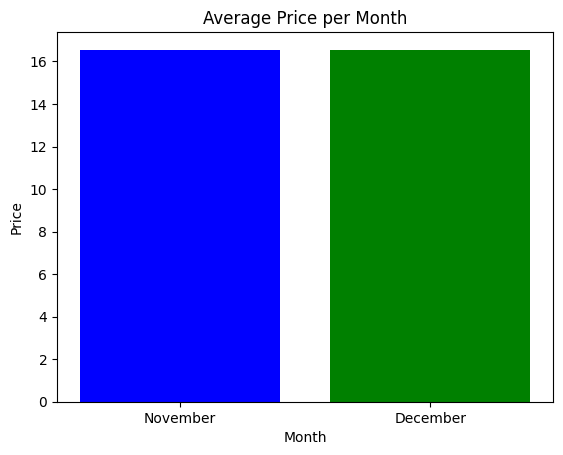

In [ ]:
# displays the average price results
average_november = df[df['month'] == 11]['price'].mean()
average_december = df[df['month'] == 12]['price'].mean()
print("Average Price in November:", average_november)
print("Average Price in Desember:", average_december)

# average monthly price
months = ['November', 'December']
averages = [average_november, average_december]

# determine the color for each month
colors = ['blue', 'green']

plt.bar(months, averages, color=colors)
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Average Price per Month')
plt.show()

There are several factors that could account for the relatively similar average prices of Uber and Lyft rides between November 2018 (16.534980532355718) and December 2018 (16.552276506193127):

**Intense Competition**: Uber and Lyft are the two largest and most well-known ridesharing companies in the industry. Intense competition between the two may have driven them to maintain relatively similar prices to stay competitive in the market. They may regularly adjust their fares to attract more customers.

**Economic Conditions and Demand**: Economic conditions and demand can also influence prices. If demand for ridesharing services remained relatively stable during that period, prices may not have fluctuated significantly. Any significant changes in demand could prompt companies to adjust their prices accordingly.

**Seasonal Factors**: November and December tend to exhibit similar travel patterns due to numerous holidays and year-end celebrations. This consistent demand for ridesharing services during this period could have affected prices.

**Regulations and Company Policies**: Government regulations and internal company policies can also impact pricing. If companies have policies governing how they set fares, they may tend to keep prices relatively stable within those boundaries.

**Data Analysis and Pricing Algorithms**: Uber and Lyft use complex algorithms to determine their trip fares based on various factors such as distance, time, demand, traffic, and more. If these factors didn't change significantly during the period, prices could remain relatively stable.

Thus, there are several factors that may have contributed to the similarity in average trip prices between Uber and Lyft during November 2018 to December 2018. It's important to note that these factors are complex, and ongoing competition between the two companies may have been a primary driver in maintaining their prices at relatively similar levels.

# IId. The impact of weather conditions on the surge multiplier rate.

Understanding the impact of weather on surge multipliers (fare increases) for stakeholders of Uber and Lyft serves several crucial functions:

- Uber and Lyft's management can utilize information regarding the weather's influence on surge multipliers to optimize their operations. If inclement weather tends to increase demand (and consequently, surge multipliers), they can adjust resource allocation and the number of drivers to capitalize on the situation.

- Uber and Lyft drivers are important stakeholders who can benefit significantly from weather-related information. Knowing that inclement weather tends to increase surge multipliers, they can plan their schedules more effectively. When they anticipate that bad weather will lead to higher surge multipliers, they may be more inclined to work during those times to boost their earnings.

- Consumers can also leverage weather and surge multiplier information to make wiser travel plans. They might choose to wait until the weather improves if surge multipliers are high, or explore alternative transportation options when fares are elevated.

- Authorities and regulators can use information about the weather's impact on surge multipliers to monitor and regulate the ridesharing industry. They may need to ensure that surge pricing is not unfairly exploited during adverse weather conditions or emergency situations.

- Data on the weather's influence on surge multipliers can be utilized for further data analysis and strategic planning. This can assist Uber and Lyft in developing better forecasting models to anticipate surge multiplier increases.

- Understanding the weather's impact on surge multipliers can also influence customer satisfaction. Uber and Lyft must ensure clear communication regarding the reasons for high surge multipliers during adverse weather and provide customers with options to make informed decisions.

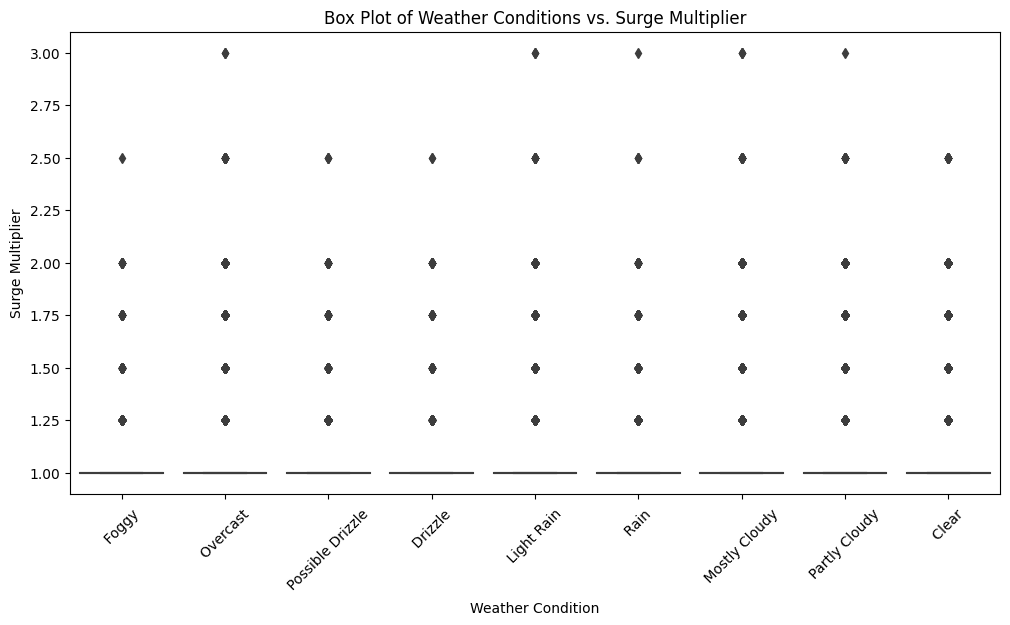

In [ ]:
# create a boxplot to see the impact of weather conditions on the surge multiplier
plt.figure(figsize=(12, 6))
sns.boxplot(x='short_summary', y='surge_multiplier', data=df)
plt.title('Box Plot of Weather Conditions vs. Surge Multiplier')
plt.xlabel('Weather Condition')
plt.ylabel('Surge Multiplier')
plt.xticks(rotation=45)
plt.show()

From the visualization above, it can be observed that when the weather conditions are 'rain,' 'mostly cloudy,' 'partly cloudy,' 'light rain,' and 'overcast,' surge multipliers tend to be higher compared to more favorable weather conditions.

This phenomenon is attributed to the fact that demand for online transportation services tends to increase during inclement weather. For instance, commuters who would typically walk after using the subway may opt to book an online taxi to avoid getting caught in the rain.

This surge in demand during adverse weather conditions often triggers the higher surge multipliers observed in the data.

# IIe. Popularity of the service

Understanding the popularity of ride-sharing services like Uber and Lyft offers significant benefits, both for consumers and those interested in the ride-sharing industry. Here are some of the key advantages:

**Market Understanding and Consumer Trends**: Knowing the popularity of Uber and Lyft helps in understanding current market trends in the transportation industry. This is crucial for investors, market analysts, and other companies in the sector.

**Improved Consumer Decision-Making**: For consumers, understanding which services are more popular can assist in making more informed decisions about which service to use, based on factors like reliability, availability, and reputation.

**Service Selection for Drivers**: For those looking to become ride-sharing drivers, knowing which service is more popular can aid in choosing which platform will offer more earning opportunities.

**Innovation and Competition**: Popularity data can drive healthy competition and innovation among ride-sharing services. This often leads to improved services for users.

**Impact on Policy and Urban Planning**: Understanding the popularity of these services is also crucial for policymakers and urban transportation planners. It assists them in regulating the industry and planning for infrastructure needs.

**Social and Environmental Impact**: Knowing the popularity of these services can help in assessing the social and environmental impacts of ride-sharing, including its effects on traffic congestion and emissions.

**Investment Analysis**: For investors, popularity information can be a key indicator of growth potential and financial stability for these companies.

**Adaptation to Changing Needs**: Companies like Uber and Lyft can use popularity data to adapt and enhance their services to meet changing customer needs and preferences.

Overall, understanding the popularity of ride-sharing services like Uber and Lyft provides valuable insights that impact various aspects of the transportation industry, consumer decisions, city policies, and business strategies.

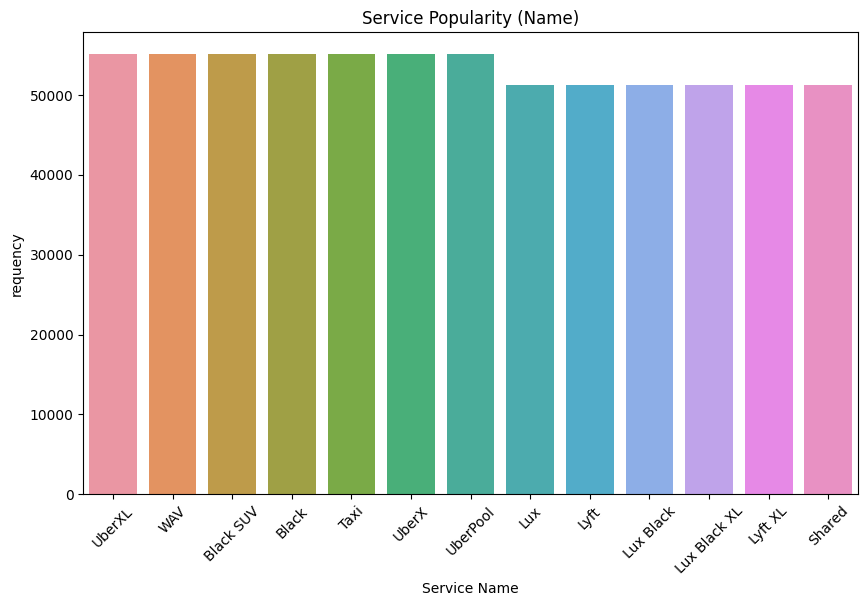

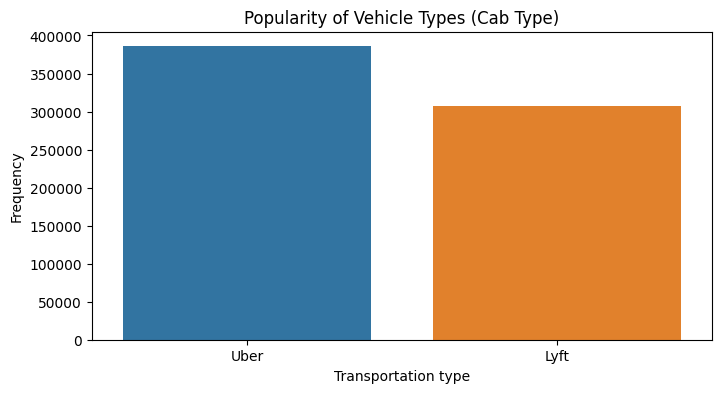

Service Frequency (name):
UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black       51235
Lux Black XL    51235
Lyft XL         51235
Shared          51233
Name: name, dtype: int64

Type  Frequency (cab_type):
Uber    385663
Lyft    307408
Name: cab_type, dtype: int64


In [ ]:
# calculating frequency for column 'name'
name_counts = df['name'].value_counts()

# calculating frequency for column 'cab_type'
cab_type_counts = df['cab_type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=name_counts.index, y=name_counts.values)
plt.title('Service Popularity (Name)')
plt.xlabel('Service Name')
plt.ylabel('requency')
plt.xticks(rotation=45)
plt.show()

# create a bar plot for 'cab_type'
plt.figure(figsize=(8, 4))
sns.barplot(x=cab_type_counts.index, y=cab_type_counts.values)
plt.title('Popularity of Vehicle Types (Cab Type)')
plt.xlabel('Transportation type')
plt.ylabel('Frequency')
plt.show()

# show results
print("Service Frequency (name):")
print(name_counts)
print("\nType  Frequency (cab_type):")
print(cab_type_counts)

The popularity of Uber's services over Lyft can be attributed to several factors:

**Early Presence and Expansion**: Uber is often one of the first ridesharing services to enter new markets. They benefit from being the 'first mover', enabling them to establish a strong user base before competitors like Lyft join the market.

**Brand Awareness and Marketing**: Uber has a global presence and frequently invests more in marketing and promotions. This increases their brand recognition among consumers.

**Extensive Driver Network**: With a longer presence in the market, Uber likely has a larger driver network. This results in shorter waiting times and better availability for users.

**Innovation and Diverse Services**: Uber often leads in introducing new features and various service types (such as UberX, Uber Black, UberPool), appealing to different market segments.

**Local Partnerships and Integration**: Uber may have formed strategic partnerships in local markets, such as with businesses or city governments, enhancing their presence and preference.

**User Perception and Experience**: Users may have a more positive perception or experience with Uber, ranging from a user-friendly app interface to the quality of customer service.

**Price Differences**: Although the price difference between Uber and Lyft is often not significant, special promotions or offers by Uber can make it more financially attractive for some users.

**Local Policies and Regulations**: Sometimes, local policies and regulations may favor one service over another, depending on how they interact with local authorities.

**Personal Preferences and Habits** : Finally, individual user habits and preferences play a role. Some people might prefer using a service they are already familiar with and trust.

It is important to note that market situations are constantly evolving, and what may be true today in Boston could be different in the future or in other cities. Additionally, individual preferences can vary greatly based on their personal experiences with each service.